# Softmax Classifier using TensorFlow

In [1]:
# credits: https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import numpy as np


<pre>
Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.
</pre>

<pre>
mnist.train.images is a tensor (an n-dimensional array) with a shape of [55000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.
</pre>

In [3]:
print("number of data points : ", mnist.train.images.shape[0],"number of pixels in each image :",mnist.train.images.shape[1])

number of data points :  55000 number of pixels in each image : 784


<pre>
we're going to want our class-labels as "one-hot vectors". A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the t-th digit will be represented as a vector which is 1 in the t-th dimension. For example, 3 would be [0,0,0,1,0,0,0,0,0,0]. Consequently, mnist.train.labels is a [55000, 10] array of floats.
</pre>

In [4]:
print("number of data points : ", mnist.test.labels.shape[0]," length of the one hot encoded label vector :",mnist.test.labels.shape[1])

number of data points :  10000  length of the one hot encoded label vector : 10


<pre>
If you want to assign probabilities to an object being one of several different things, softmax (Multiclass Logistic regression) is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. Even later on, when we train more sophisticated models, the final step will be a layer of softmax.

A softmax regression has two steps: first we add up the evidence of our input being in certain classes, and then we convert that evidence into probabilities.
</pre>

In [5]:
import tensorflow as tf

In [6]:
# Get a list of devices like GPUs and CPUs available to TF

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2669854292154036310
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3153041817
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11468235471759201193
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Placeholders and Variables

In [7]:
# x isn't a specific value. It's a placeholder. A placeholder can be imagained as 
# a memory unit that we use to load various mini-batches of imput data while training.


# We want to be able to input any number of MNIST images, 
# each flattened into a 784-dimensional vector. 

# We represent this as a 2-D tensor of floating-point numbers, 
# with a shape [None, 784]. 

# (Here None means that a dimension can be of any length.)
x = tf.placeholder(tf.float32, [None, 784])

# We also need the weights and biases for our model. 

# We could imagine treating these like additional inputs, 
# but TensorFlow has an even better way to handle it: Variable. 

# A Variable is a modifiable tensor that lives in TensorFlow's graph
# of interacting operations. 

# It can be used and even modified by the computation. 
# For machine learning applications, one generally has the model parameters be Variables.
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# First, we multiply x by W with the expression tf.matmul(x, W). 
# This is flipped from when we multiplied them in our equation, 
# where we had Wx , as a small trick to deal with x being a 2D tensor 
# with multiple inputs. 

# We then add b, and finally apply tf.nn.softmax.
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
# y_ is true label of the images, and similar to x
y_ = tf.placeholder(tf.float32, [None, 10])


# Defining the loss function: multi class log-loss/cross-entropy
# First, tf.log computes the logarithm of each element of y. 

# Next, we multiply each element of y_ with the corresponding element 
# of tf.log(y). 

# Then tf.reduce_sum adds the elements in the second dimension of y, 
# due to the reduction_indices=[1] parameter. 

#Tutorial for tf.reduce_sum: https://www.dotnetperls.com/reduce-sum-tensorflow

# Reduction is an operation that removes one or more dimensions from a tensor by performing 
# certain operations across those dimensions.

# Finally, tf.reduce_mean computes the mean over all the examples in the batch.
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [10]:
# In this case, we ask TensorFlow to minimize cross_entropy 
# using the gradient descent algorithm with a learning rate of 0.05.

# https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers

train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

# What TensorFlow actually does here, behind the scenes,
# is to add new operations to your computation-graph which implement backpropagation and gradient descent.
# Then it gives you back a single operation which, when run, does a step of gradient descent training, 
# slightly tweaking your variables to reduce the loss.

Instructions for updating:
Use tf.cast instead.


In [11]:
# We can now launch the model in an InteractiveSession
sess = tf.InteractiveSession()

# We first have to create an operation to initialize the 
# variables we created:
tf.global_variables_initializer().run()

In [12]:
# Each step of the loop, we get a "mini-batch" of one hundred random data 
# points from our training set. 

# We run train_step feeding in the batches data to replace 
# the placeholders
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Using small batches of random data is called stochastic training -- in this case, stochastic gradient descent. 
# Ideally, we'd like to use all our data for every step of training because that would give us a better sense of
# what we should be doing, but that's expensive. So, instead, we use a different subset every time. 
# Doing this is cheap and has much of the same benefit.

In [13]:
# https://stackoverflow.com/a/41863099
# tf.argmax(input, axis=None, name=None, dimension=None)
# Returns the index with the largest value across axis of a tensor.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9035


In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
def plt_dynamic(x, y, y_1, ax, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


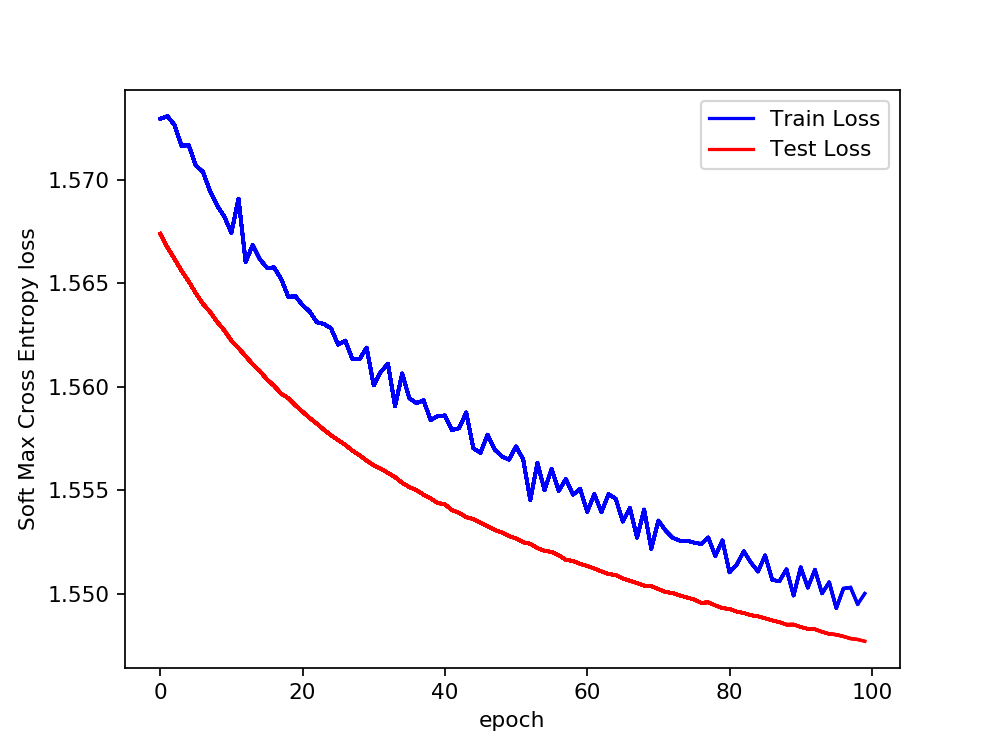

Accuracy: 0.9242


In [23]:
# summarizing everything in single cell
training_epochs = 100
batch_size = 100
display_step = 1
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
xs, ytrs, ytes = [], [], []
for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c1 = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c1 / total_batch
            c2 = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c2 / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax)
        

plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

<h3>As we can see for 15 epochs i have accuracy =0.9035 & for 100 epochs it is 0.9242 not much change so try some another optimizor

# Now Use AdamOptimizer & run same Code

<IPython.core.display.Javascript object>


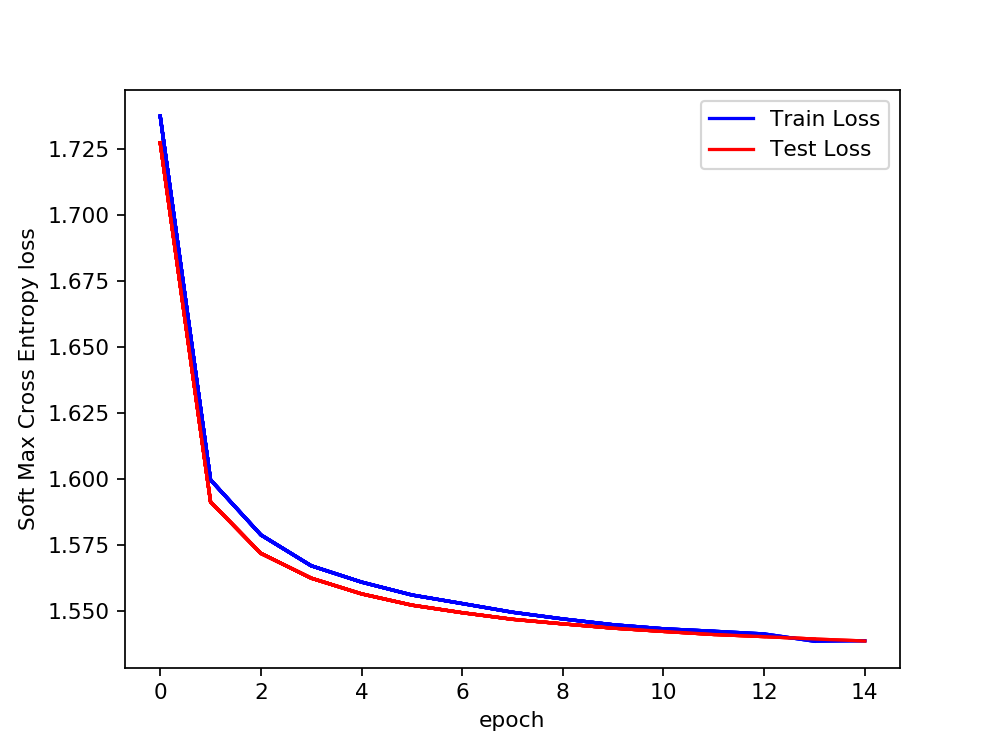

Accuracy: 0.9314


In [26]:
# use Adam

import datetime

# summarizing everything in single cell
training_epochs = 15
batch_size = 100
display_step = 1
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
train_step = tf.train.AdamOptimizer(learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam').minimize(cross_entropy)


# We can now launch the model in an InteractiveSession
sess = tf.InteractiveSession()

# We first have to create an operation to initialize the                            
# variables we created:
tf.global_variables_initializer().run()
#*************************************************************************************************************************
# Since AdamOptimizer has it's own variables, you should define the initilizer init after opt, not before.
#*************************************************************************************************************************

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
xs, ytrs, ytes = [], [], []


for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c1 = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c1 / total_batch
            c2 = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c2 / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax)
        
plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))



<IPython.core.display.Javascript object>


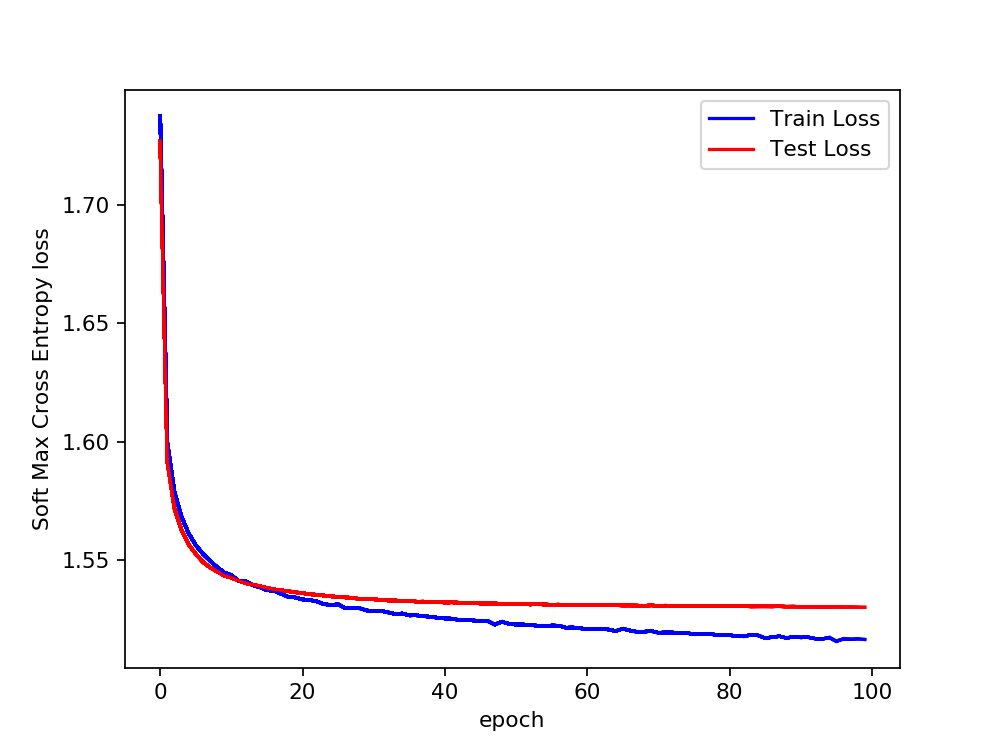

Accuracy: 0.9339


In [29]:
# use Adam for 100 epochs

import datetime

# summarizing everything in single cell
training_epochs = 100
batch_size = 100
display_step = 1
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
train_step = tf.train.AdamOptimizer(learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam').minimize(cross_entropy)


# We can now launch the model in an InteractiveSession
sess = tf.InteractiveSession()

# We first have to create an operation to initialize the                            
# variables we created:
tf.global_variables_initializer().run()
#*************************************************************************************************************************
# Since AdamOptimizer has it's own variables, you should define the initilizer init after opt, not before.
#*************************************************************************************************************************

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
xs, ytrs, ytes = [], [], []


for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c1 = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c1 / total_batch
            c2 = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c2 / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax)
        
plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))


# Conclusion

In [32]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
p = PrettyTable()

p.field_names = ["Optimizer", "Epoch", "Batch_size","Accuracy"]

p.add_row(["GradientDescentOptimizer",  "15","100","0.9035"])
p.add_row(["GradientDescentOptimizer" , "100","100","0.9242"])
p.add_row(["AdamOptimizer",  "15","100","0.9314" ])
p.add_row(["AdamOptimizer",  "100","100","0.9339" ])

print(p)

+--------------------------+-------+------------+----------+
|        Optimizer         | Epoch | Batch_size | Accuracy |
+--------------------------+-------+------------+----------+
| GradientDescentOptimizer |   15  |    100     |  0.9035  |
| GradientDescentOptimizer |  100  |    100     |  0.9242  |
|      AdamOptimizer       |   15  |    100     |  0.9314  |
|      AdamOptimizer       |  100  |    100     |  0.9339  |
+--------------------------+-------+------------+----------+


# ----------------------------------END Of NoteBook-----------------------------------------------